In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
dataset = pd.read_csv('dataset/real_estate_price_size.csv')

In [4]:
dataset.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [5]:
dataset.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [6]:
x = dataset['size']
y = dataset['price']

In [7]:
print('x.shape = ', x.shape)
print('y.shape = ', y.shape)

x.shape =  (100,)
y.shape =  (100,)


In [9]:
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(100, 1)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_matrix, y)

LinearRegression()

In [12]:
# R-squared
regressor.score(x_matrix, y)

0.7447391865847587

In [13]:
# Coefficients
regressor.coef_

array([223.17874259])

In [14]:
# intercepts
regressor.intercept_

101912.60180122912

In [16]:
from sklearn.metrics import r2_score
r2_score(x_matrix, y)

-1032906.3058754539

In [22]:
size = pd.DataFrame(data=[648, 756], columns=['size'])
new_size = size.values.reshape(-1,1)
regressor.predict(new_size)

array([246532.42700253, 270635.73120275])

In [23]:
size['predicted_price'] = regressor.predict(new_size)
size

,size,predicted_price
0,648,246532.427003
1,756,270635.731203


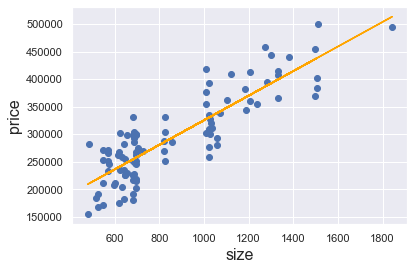

In [24]:
plt.scatter(x, y)
yhat = regressor.coef_ * x + regressor.intercept_
fig = plt.plot(x, yhat, color = 'orange', label='regression line')
plt.xlabel('size', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()